# This project is independently carried out by me, Elvin Zeynalli. All the codings belong to me. The dataset is publicly obtained from Kaggle.

In [1]:
# Import pandas to initiate the data formation
import pandas as pd
import numpy as np

## Data collection and cleaning

In [2]:
# Create a link to raw format of dataset via GitHub
dataset_url = "https://raw.githubusercontent.com/mrzeynalli/fifa_23_players_analysis/main/datasets/FIFA23_official_data.csv"

# Store the data into a dataframe object
fifa23_df = pd.read_csv(dataset_url)

In [3]:
# Display the number of rows and columns

raws_count = fifa23_df.shape[0]
columns_count = fifa23_df.shape[1]

print("The number of rows in the dataset is {}".format(raws_count)) # Rows
print("The number of columns in the dataset is {}".format(columns_count)) # Columns

The number of rows in the dataset is 17660
The number of columns in the dataset is 29


In [4]:
# Display the datatype of each feature
fifa23_df.dtypes

ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Release Clause               object
Kit Number                  

After careful observation, it was noticed that some players, who already retired from a club, are still shown as the players of that particular club. In such occasions, the players' names start with their latest kit number. This enables me to seperate those players by applying an algorith to detect the player names that start with digits. The below code clearly shows that Xavi Hernandez, a former player of Barcelona, is still shown as a current player, but with obscured player name.

In [5]:
fifa23_df.loc[234]

ID                                                                     10535
Name                                                                 15 Xavi
Age                                                                       34
Photo                       https://cdn.sofifa.net/players/010/535/15_60.png
Nationality                                                            Spain
Flag                                     https://cdn.sofifa.net/flags/es.png
Overall                                                                   86
Potential                                                                 86
Club                                                            FC Barcelona
Club Logo                            https://cdn.sofifa.net/teams/241/30.png
Value                                                                 €15.5M
Wage                                                                   €160K
Special                                                                 2104

In [6]:
# This list object will store the indices of players whose names start with digit
player_indices_to_remove = []

# This loop iterates through the indices of all players to detect the ones with digit-starting player names
for index in fifa23_df.index.to_list():
    
    player = fifa23_df['Name'].loc[index]
    
    player_first_name = fifa23_df['Name'].loc[index][0]
    
    # If the player name starts with digit, it adds the index of that observation to removable indices list
    if player_first_name.isnumeric():
        
        player_indices_to_remove.append(index)

In [7]:
# Now, we drop the indices of players who are unnecesarily included in the dataset
fifa23_df.drop(player_indices_to_remove,axis=0,inplace=True)

# We reset the indices of the dataframe
fifa23_df.reset_index(drop=True,inplace=True)

Couple of features such as value, wage, and release clause have values labeled with currency symbol and M or K, indicating million or thousands, respectively. They need to be converted into numeric format to be analyzed later. The below function is defined to reach this objective.

In [8]:
def curreny_correction(column,dataframe, curreny_sign = str):
    
    # Split the value by the given currency symbol: euro in our instance
    values = dataframe[column].str.split(curreny_sign, expand = True)[1].str[:-1]
    letters = dataframe[column].str.split(curreny_sign, expand = True)[1].str[-1:]
    
    # Create a list object that will store the float-converted format of the values
    values_float = []
    
    for value, letter in zip(values, letters):
        
        if letter == 'M': # Checks if letter is 'M' or the value is million
            
            try: # When values are zero, they cannot be converted into float and raises ValueError. 
                 #I debug the coding for those occasions
                float_value = float(value) * 1000000
                values_float.append(float_value)

            except ValueError: # Adds just 0 when ValueError is raised
                float_value = 0
                values_float.append(float_value)
                
                
        else: # Else if the letter is 'K' or the value is thousands
            
            try: # When values are zero, they cannot be converted into float and raises ValueError. 
                 #I debug the coding for those occasions
                float_value = float(value) * 1000
                values_float.append(float_value)

            except ValueError: # Adds just 0 when ValueError is raised
                float_value = 0
                values_float.append(float_value)
    
    # Returns the float values that are stripped of currency symbol and exponential letters
    return values_float

In [9]:
# Apply the function for 'Value' column
fifa23_df['Value'] = curreny_correction('Value', fifa23_df, '€')

# Apply the function for 'Wage' column
fifa23_df['Wage'] = curreny_correction('Wage', fifa23_df, '€')

# Apply the function for 'Release Clause' column
fifa23_df['Release Clause'] = curreny_correction('Release Clause', fifa23_df, '€')

In the dataset, 'Position' feature is also given in a bad format and needs to be corrected. The actual position labels are given after '>' signs. So, I split the values seperated by that sign and took the first index , or second item of split.

Additioanlly, 'Heigh' and 'Weight' values are also given with 'cm' and 'kg' indicators, respectively. They need to be corrected, as well.

In [10]:
# Correcting 'Position' feature
fifa23_df['Position'] = fifa23_df['Position'].str.split('>', expand=True)[1]

# Correcting 'Height' feature
heigh_values = [float(value) for value in fifa23_df['Height'].str.split("cm", expand = True)[0]]
fifa23_df['Height'] = heigh_values

# Correcting 'Weight' feature
weight_values = [float(value) for value in fifa23_df['Weight'].str.split("kg", expand = True)[0]]
fifa23_df['Weight'] = weight_values

In [11]:
# Checking for missing values
fifa23_df.isna().sum().sort_values(ascending=False)

Best Overall Rating         10753
Loaned From                 10205
Joined                        786
Release Clause                655
Contract Valid Until          232
Club                           89
Kit Number                     13
Position                       13
Weak Foot                       0
Weight                          0
Height                          0
Real Face                       0
Body Type                       0
Work Rate                       0
Skill Moves                     0
ID                              0
Name                            0
Preferred Foot                  0
Special                         0
Wage                            0
Value                           0
Club Logo                       0
Potential                       0
Overall                         0
Flag                            0
Nationality                     0
Photo                           0
Age                             0
International Reputation        0
dtype: int64

There are some coluns that are not needed in the analysis. These columns include urls of particular items, including photo, club logo, flag.

Further, some columns have very high quantity of null values, incuding 'Loaned From' and 'Best Overall Rating'.

'Work rate' and 'Real Face' features are also unnecessary in the analysis.

In [12]:
# Store the removable columns into a list object
columns_to_remove = ['ID','Photo','Flag','Club Logo','Work Rate','Real Face',
                     'Loaned From','Best Overall Rating', 'International Reputation',
                     'Weak Foot', 'Skill Moves','Kit Number', 'Special']

# Drop the candidate columns and store it into a new cleaned dataframe object
fifa23_df_cleaned = fifa23_df.drop(columns=columns_to_remove)

# Reset the index of the new dataframe object
fifa23_df_cleaned.reset_index(drop=True,inplace=True)

'Release Clause' columns have 655 columns, which is not large enought to be removed completely. Thus, I decided that it'd be a better approach to remove the rows with missing values.

In [13]:
fifa23_df_cleaned.dropna(subset=['Release Clause'], inplace=True)

In [14]:
# The final dataset for analysis
raws_count = fifa23_df_cleaned.shape[0]
columns_count = fifa23_df_cleaned.shape[1]

print("The number of rows in the dataset is {}".format(raws_count)) # Rows
print("The number of columns in the dataset is {}".format(columns_count)) # Columns

The number of rows in the dataset is 10104
The number of columns in the dataset is 16


## Data visuzaliation

In [15]:
# Import necessary librarires to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

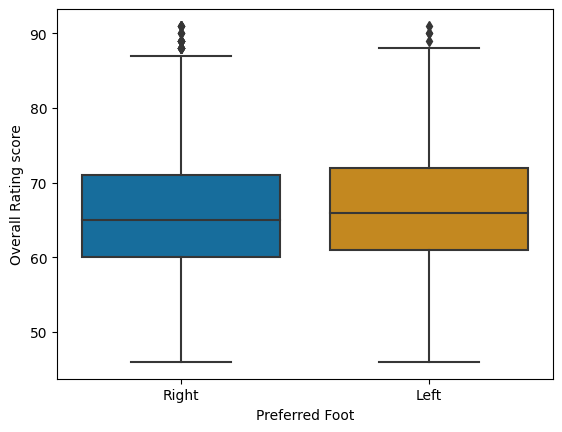

In [16]:
# Display the box plot of preferred foot and value
fig = sns.boxplot(data = fifa23_df_cleaned, x = 'Preferred Foot', y = 'Overall', palette = 'colorblind')

# label x and y axis
fig = plt.ylabel('Overall Rating score')
fig = plt.xlabel('Preferred Foot')

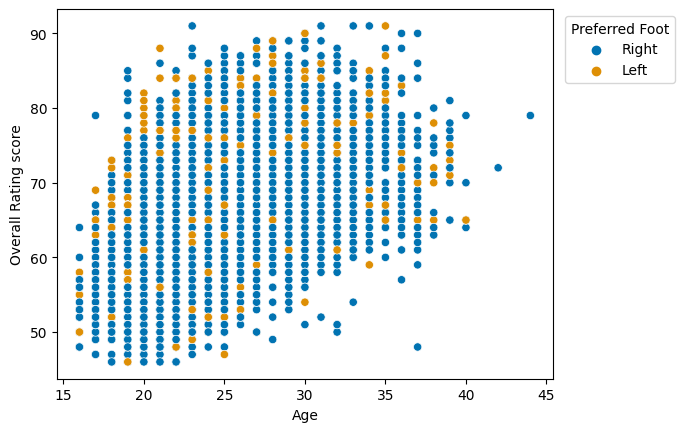

In [17]:
# Draw the scatter plot for age and overall rating, hued by preferred foot
fig = sns.scatterplot(data = fifa23_df_cleaned,
                      x = 'Age',
                      y = 'Overall',
                      hue = 'Preferred Foot',
                      palette = 'colorblind')

# Add the legend to te upper right side of the chart area
fig = plt.legend(bbox_to_anchor=(1.26, 1), loc='upper right', title='Preferred Foot')

# label x and y axis
fig = plt.ylabel('Overall Rating score')
fig = plt.xlabel('Age')

<AxesSubplot: >

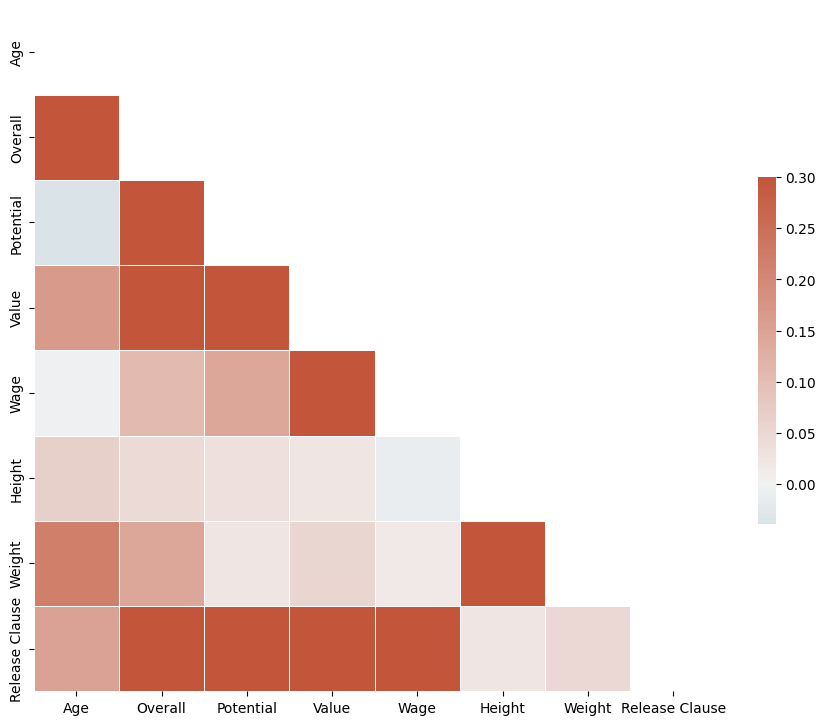

In [18]:
# Store the names of all numeric columns into a list
numeric_columns = fifa23_df_cleaned.select_dtypes(include=['int64','float64']).columns.tolist()

# Compute the correlation matrix
corr = fifa23_df_cleaned[numeric_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Clustering: K-Means Clustering

## Data pre-processing

In [19]:
# Import standard scaler to z-score normalize the data
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

In [20]:
# Scale the numeric columns
scaled_values = scaler.fit_transform(fifa23_df_cleaned[numeric_columns])

In [21]:
# Sonvert the numpy array of scaled values into a dataframe
scaled_values = pd.DataFrame(scaled_values, columns = numeric_columns)

In [22]:
# Describe the scaled columns: each has 0 mean and 1 standard deviation
scaled_values.describe().round(2)

,Age,Overall,Potential,Value,Wage,Height,Weight,Release Clause
count,10104.00,10104.00,10104.00,10104.00,10104.00,10104.00,10104.00,10104.00
mean,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.75,-2.42,-3.77,-0.41,-0.83,-3.80,-3.67,-0.40
25%,-0.84,-0.69,-0.69,-0.36,-0.77,-0.77,-0.68,-0.36
50%,-0.16,-0.07,-0.08,-0.30,-0.49,-0.05,0.03,-0.30
75%,0.52,0.67,0.69,-0.14,0.70,0.67,0.60,-0.13
max,4.60,3.14,3.47,18.77,13.22,3.55,4.16,18.61


## K-Means clustering

In [23]:
# Import KMeans clutering class
from sklearn.cluster import KMeans

### Figuring out the best K for clustering

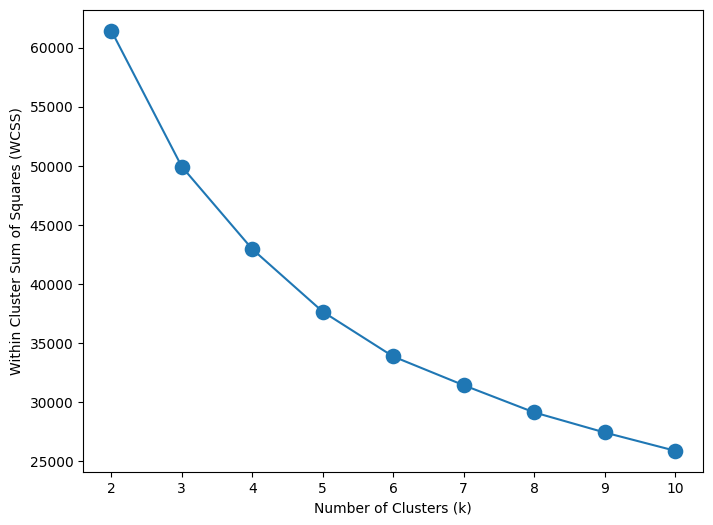

In [24]:
# Using Within-Cluster Sum of Squares (WCSS) to observe the best K from the chart

# Create a list to store WCSS values
wcss = []

# Iterate in a range from 2 to 10, inclusive
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234) # Create a cluster object for each k
    km.fit(scaled_values) # Fit the scaled data
    wcss.append(km.inertia_) # Add the inertia score to wcss list

# Convert the wcss list into a pandas series object
wcss_series = pd.Series(wcss, index = range(2, 11))

# Draw a line chart showing the inertia score, or WCSS, for each k iterated
plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

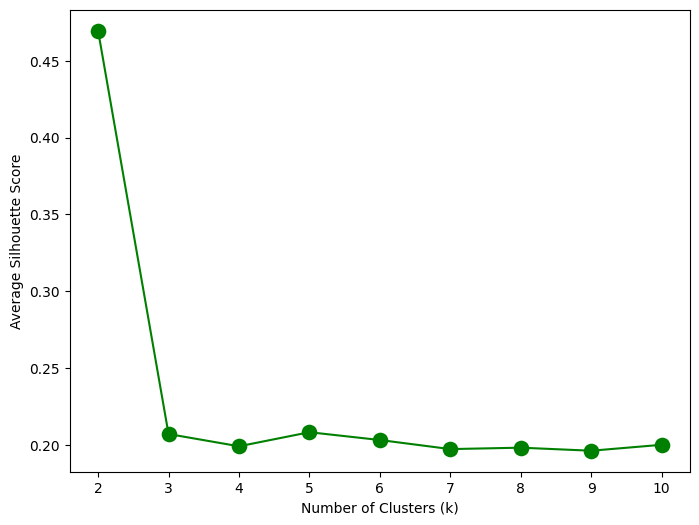

In [31]:
# Using Average Silhouette Method to determine the best K

from sklearn.metrics import silhouette_score # Import silhouette_score function

# Create a list to store silhouette values
silhouette = []

# Iterate in a range from 2 to 10, inclusive
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234) # Create a cluster object for each k
    km.fit(scaled_values) # Fit the scaled data
    silhouette.append(silhouette_score(scaled_values, km.labels_)) # Add the silhouette score to silhouette list

# Convert the silhouette list into a pandas series object
silhouette_series = pd.Series(silhouette, index = range(2, 11))

# Draw a line chart showing the average silhouette score for each k iterated
plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index, color='green')
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150, color='green')
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

The methods - WCSS and Average Silhouette Method - display that the best k for clustering is 5. Hence, I will set the number of clusters to be 5.

### k-Means clustering

In [26]:
# Create kmeans object
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)

# Fit the scaled values
km.fit(scaled_values)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [27]:
# Check out how many players each cluster possesses
for index in range(len(pd.Series(km.labels_).value_counts())):
    print('Cluster',pd.Series(km.labels_).value_counts().sort_index().index[index],'has',
          pd.Series(km.labels_).value_counts().sort_index()[index],'players')

Cluster 0 has 2640 players
Cluster 1 has 3228 players
Cluster 2 has 903 players
Cluster 3 has 3197 players
Cluster 4 has 136 players


In [28]:
# Create a dataframe storing cluster centers for each column
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = numeric_columns)

In [29]:
# Add the cluster indicator for every single player in the dataset
fifa23_df_cleaned['cluster'] = km.labels_.tolist()

In [30]:
# Group the dataframe by the cluster indicators
fifa23_df_cleaned.groupby('cluster').mean(numeric_only=True).round(2)

,Age,Overall,Potential,Value,Wage,Height,Weight,Release Clause
cluster,,,,,,,,
0,20.47,56.40,67.42,386295.45,44692.80,180.29,72.88,7.700856e+05
1,23.80,67.22,73.81,2275497.21,14163.88,175.94,69.68,4.378210e+06
2,26.35,78.79,81.78,19393023.26,49131.78,182.18,75.93,3.738128e+07
3,25.44,66.95,72.08,1892169.22,15918.36,187.44,81.06,3.557997e+06
4,26.29,85.38,88.04,67459558.82,147213.24,182.27,76.98,1.309640e+08
